In [1]:
import pandas, numpy
import matplotlib.pyplot as plt
import matplotlib.axes, matplotlib.figure
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

trainData = pandas.read_csv('train.csv')
testData = pandas.read_csv('test.csv')
trainData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
testData

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 从pygwalker（或者trainData.count）的分析来看，训练数据中Cabin严重缺失大量数据，Age其次，下面分别查看幸存者总数与这两个特征下幸存者总数的占比，从而确定后面数据处理方式

In [3]:
# 看一看那些拥有Cabin数据的系列有多少人是幸存者
trainData[(trainData.Survived == 1) & (~trainData.Cabin.isnull())]
# 从结果来看136人携带Cabin信息是存活的，占了携带Cabin信息的人数（204）的大部分，可见Cabin对幸存起着重要作用！

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
...,...,...,...,...,...,...,...,...,...,...,...,...
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [4]:
# 再来看看Age的
trainData[(trainData.Survived == 1) & (~trainData.Age.isnull())]
# 290 / 714，将缺失Age的筛除

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [5]:
# 筛除丢失Age和Embarked后的数据
trainData = trainData[~trainData.Age.isnull() & ~trainData.Embarked.isnull()]
trainData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
# 将Cabin特征下的A~?开头的票分别统计的函数
_Cabin : pandas.Series = trainData.Cabin[~trainData.Cabin.isnull()]
_Cabin = _Cabin.apply(lambda x : x[0])
CabinDicts = {}
CabinKeys = set(_Cabin)
for e in CabinKeys:
    CabinDicts[e] = _Cabin[_Cabin == e].__len__()
minKey = min(CabinDicts, key=CabinDicts.get)

def cabin_cope(cabin : pandas.Series):
    return cabin.apply(lambda x : x[0] if isinstance(x, str) and x[0] in CabinKeys else minKey)
    
# 补全Cabin缺失值，策略是使用影响最小的属性
trainData.Cabin = cabin_cope(trainData.Cabin)
trainData

C:\Users\25654\AppData\Local\Temp\ipykernel_39480\2150145236.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData.Cabin = cabin_cope(trainData.Cabin)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,T,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,T,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,T,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,T,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,T,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C


In [7]:
# 筛除无关紧要的特征
trainResult = trainData.Survived
trainDataSurvived = trainData.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
trainData = trainDataSurvived.drop('Survived', axis=1)
trainData

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,T,S
1,1,female,38.0,1,0,71.2833,C,C
2,3,female,26.0,0,0,7.9250,T,S
3,1,female,35.0,1,0,53.1000,C,S
4,3,male,35.0,0,0,8.0500,T,S
...,...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,T,Q
886,2,male,27.0,0,0,13.0000,T,S
887,1,female,19.0,0,0,30.0000,B,S
889,1,male,26.0,0,0,30.0000,C,C


In [8]:
testData = testData.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
testData

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,NaN,S
414,1,female,39.0,0,0,108.9000,C105,C
415,3,male,38.5,0,0,7.2500,NaN,S
416,3,male,NaN,0,0,8.0500,NaN,S


In [9]:
trainDataSurvivors = trainDataSurvived[trainDataSurvived.Survived == 1]
trainDataSurvivors

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,T,S
3,1,1,female,35.0,1,0,53.1000,C,S
8,1,3,female,27.0,0,2,11.1333,T,S
9,1,2,female,14.0,1,0,30.0708,T,C
...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,T,C
879,1,1,female,56.0,0,1,83.1583,C,C
880,1,2,female,25.0,0,1,26.0000,T,S
887,1,1,female,19.0,0,0,30.0000,B,S


''

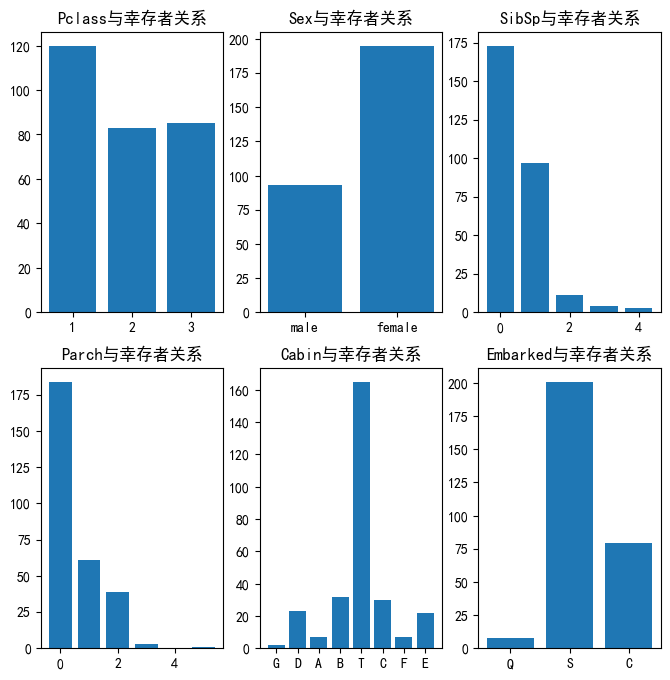

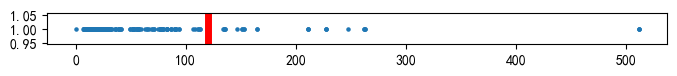

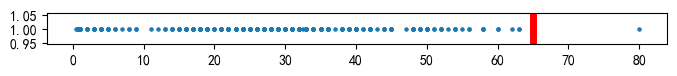

In [10]:
# 先看一下各个特征与幸存者的关系
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 把Age和Fare这两个数据比较杂的单独分析
fig, axes = plt.subplots(2, 3, figsize=(8, 8))
fig : matplotlib.figure.Figure
axes : list[list[matplotlib.axes.Axes]]
cols = trainDataSurvivors.columns.to_list()
cols.remove('Fare')
cols.remove('Survived')
cols.remove('Age')
_index = 0
for i in range(2):
    for j in range(3):
        col = cols[_index]
        sets = set(trainDataSurvivors[col])
        dicts = {}
        for e in sets:
            dicts[e] = trainDataSurvivors[trainDataSurvivors[col] == e].__len__()
        _index += 1
        axes[i][j].set_title(f'{col}与幸存者关系')
        axes[i][j].bar(dicts.keys(), dicts.values())
# 与Age
plt.figure(figsize=(8, .4))
plt.scatter(trainDataSurvivors.Fare.values, trainDataSurvivors.Survived.values, s=5)
plt.axvline(x=120, lw=5, c='r')

# 与Age
plt.figure(figsize=(8, .4))
plt.scatter(trainDataSurvivors.Age.values, trainDataSurvivors.Survived.values, s=5)
plt.axvline(x=65, lw=5, c='r')
;

## 从上面的可视化可见，比如：存活与Age相关性应该是比较小的（因为Age分布较为均匀）、Fare在120以下的人幸存更多

In [11]:
# 处理测试数据的空值，Cabin特征单独处理，其他使用SimpleImputer的最频繁策略替换
testData.Cabin = cabin_cope(testData.Cabin)
imputer = SimpleImputer(strategy='most_frequent')
for feature in trainData.columns:
    trainData[[feature]] = imputer.fit_transform(trainData[[feature]])
    testData[[feature]] = imputer.transform(testData[[feature]])
testData

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,T,Q
1,3,female,47.0,1,0,7.0000,T,S
2,2,male,62.0,0,0,9.6875,T,Q
3,3,male,27.0,0,0,8.6625,T,S
4,3,female,22.0,1,1,12.2875,T,S
...,...,...,...,...,...,...,...,...
413,3,male,24.0,0,0,8.0500,T,S
414,1,female,39.0,0,0,108.9000,C,C
415,3,male,38.5,0,0,7.2500,T,S
416,3,male,24.0,0,0,8.0500,T,S


In [12]:
testData.columns, trainData.columns

(Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object'),
 Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object'))

In [13]:
# 数据映射，不太会用LabelEncoder，老是出错，自己写了个
# 上面已经求出来了CabinKeys
# Sex就0或者1
# EmbarkedKeys求一下
# 在处理未知的数据，统一用0替换
EmbarkedKeys = set(trainData.Embarked)
CabinMaps = {}
SexMaps = {"male" : 1, 'female' : 0}
EmbarkedMaps = {}
for i, e in enumerate(CabinKeys):
    CabinMaps[e] = i
for i, e in enumerate(EmbarkedKeys):
    EmbarkedMaps[e] = i
UNKNOW_ENOCDE = 0
# 编码
trainData.Cabin = trainData.Cabin.apply(lambda x : CabinMaps.get(x, UNKNOW_ENOCDE))
trainData.Sex = trainData.Sex.apply(lambda x : SexMaps.get(x, UNKNOW_ENOCDE))
trainData.Embarked = trainData.Embarked.apply(lambda x : EmbarkedMaps.get(x, UNKNOW_ENOCDE))

testData.Cabin = testData.Cabin.apply(lambda x : CabinMaps.get(x, UNKNOW_ENOCDE))
testData.Sex = testData.Sex.apply(lambda x : SexMaps.get(x, UNKNOW_ENOCDE))
testData.Embarked = testData.Embarked.apply(lambda x : EmbarkedMaps.get(x, UNKNOW_ENOCDE))

trainData

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,4,1
1,1,0,38.0,1,0,71.2833,5,2
2,3,0,26.0,0,0,7.9250,4,1
3,1,0,35.0,1,0,53.1000,5,1
4,3,1,35.0,0,0,8.0500,4,1
...,...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250,4,0
886,2,1,27.0,0,0,13.0000,4,1
887,1,0,19.0,0,0,30.0000,3,1
889,1,1,26.0,0,0,30.0000,5,2


In [14]:
testData

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.5,0,0,7.8292,4,0
1,3,0,47.0,1,0,7.0000,4,1
2,2,1,62.0,0,0,9.6875,4,0
3,3,1,27.0,0,0,8.6625,4,1
4,3,0,22.0,1,1,12.2875,4,1
...,...,...,...,...,...,...,...,...
413,3,1,24.0,0,0,8.0500,4,1
414,1,0,39.0,0,0,108.9000,5,2
415,3,1,38.5,0,0,7.2500,4,1
416,3,1,24.0,0,0,8.0500,4,1


In [15]:
# 特征缩放到0~1
scaler = MinMaxScaler()
trainData = pandas.DataFrame(scaler.fit_transform(trainData), columns=trainData.columns)
testData = pandas.DataFrame(scaler.transform(testData), columns=trainData.columns)
trainData

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1.0,1.0,0.271174,0.2,0.000000,0.014151,0.571429,0.5
1,0.0,0.0,0.472229,0.2,0.000000,0.139136,0.714286,1.0
2,1.0,0.0,0.321438,0.0,0.000000,0.015469,0.571429,0.5
3,0.0,0.0,0.434531,0.2,0.000000,0.103644,0.714286,0.5
4,1.0,1.0,0.434531,0.0,0.000000,0.015713,0.571429,0.5
...,...,...,...,...,...,...,...,...
707,1.0,0.0,0.484795,0.0,0.833333,0.056848,0.571429,0.0
708,0.5,1.0,0.334004,0.0,0.000000,0.025374,0.571429,0.5
709,0.0,0.0,0.233476,0.0,0.000000,0.058556,0.428571,0.5
710,0.0,1.0,0.321438,0.0,0.000000,0.058556,0.714286,1.0


In [16]:
testData

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1.0,1.0,0.428248,0.0,0.000000,0.015282,0.571429,0.0
1,1.0,0.0,0.585323,0.2,0.000000,0.013663,0.571429,0.5
2,0.5,1.0,0.773813,0.0,0.000000,0.018909,0.571429,0.0
3,1.0,1.0,0.334004,0.0,0.000000,0.016908,0.571429,0.5
4,1.0,0.0,0.271174,0.2,0.166667,0.023984,0.571429,0.5
...,...,...,...,...,...,...,...,...
413,1.0,1.0,0.296306,0.0,0.000000,0.015713,0.571429,0.5
414,0.0,0.0,0.484795,0.0,0.000000,0.212559,0.714286,1.0
415,1.0,1.0,0.478512,0.0,0.000000,0.014151,0.571429,0.5
416,1.0,1.0,0.296306,0.0,0.000000,0.015713,0.571429,0.5


预测存活情况 :  [0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


''

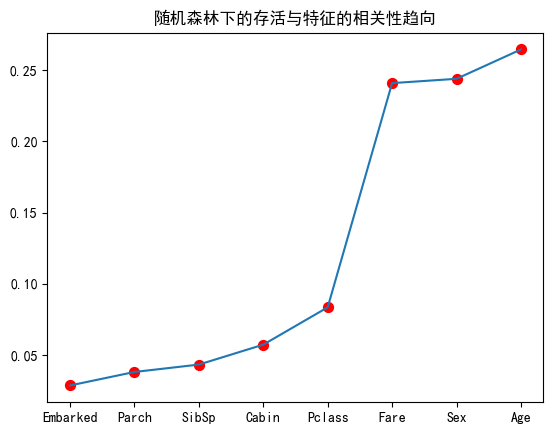

In [17]:
# 训练与测试（依据是800多数据、八个特征，选择适合此规模的模型）
# 基于随机森林
rf = RandomForestClassifier(random_state=42)
rf.fit(trainData, trainResult)
# 相关性可视化
# 之前做过分析，Age对存活影响不大，Fare影响较为明显，但是随机森林测得Age相关性最高
relevance = pandas.DataFrame({
    '特征' : rf.feature_names_in_,
    '相关性': rf.feature_importances_
})
relevance = relevance.sort_values(by='相关性')
plt.plot(numpy.arange(8), relevance.相关性)
plt.scatter(numpy.arange(8), relevance.相关性, s=50, c='r')
plt.xticks(labels=relevance.特征, ticks=numpy.arange(8), )
predictions = rf.predict(testData)
print("预测存活情况 : ", predictions)
plt.title('随机森林下的存活与特征的相关性趋向')
;

预测存活情况 :  [0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


''

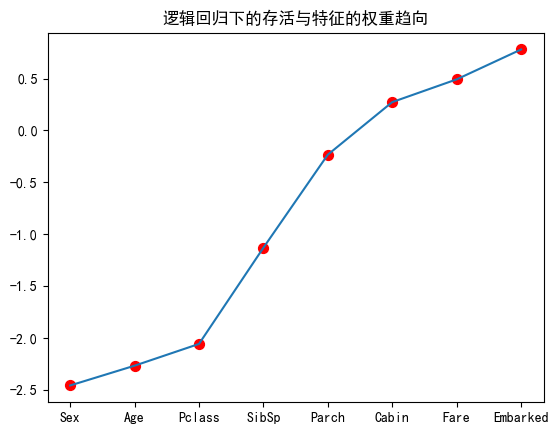

In [18]:
# 再来试试逻辑回归
# 如直方图和散点分配展示的一样，Cabin、Fare、Parch、Embarked都有明显的数据偏向，因此逻辑回归的效果是很好的
lg = LogisticRegression(max_iter=1000, random_state=42)
lg.fit(trainData, trainResult)
relevance = pandas.DataFrame({
    '特征' : lg.feature_names_in_,
    '权重' : lg.coef_[0]
})
relevance = relevance.sort_values(by='权重')
plt.plot(numpy.arange(8), relevance.权重)
plt.scatter(numpy.arange(8), relevance.权重, s=50, c='r')
plt.xticks(labels=relevance.特征, ticks=numpy.arange(8), )
predictions = lg.predict(testData)
print("预测存活情况 : ", predictions)
plt.title('逻辑回归下的存活与特征的权重趋向')
# 写入结果
genData : pandas.DataFrame = pandas.read_csv('gender_submission.csv') 
genData.Survived = predictions
genData.to_csv('gender_submission_predict.csv', index=False)
;

预测存活情况 :  [0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1
 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0
 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0
 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0
 0 1 1 1 1 1 0 1 0 0 0]


''

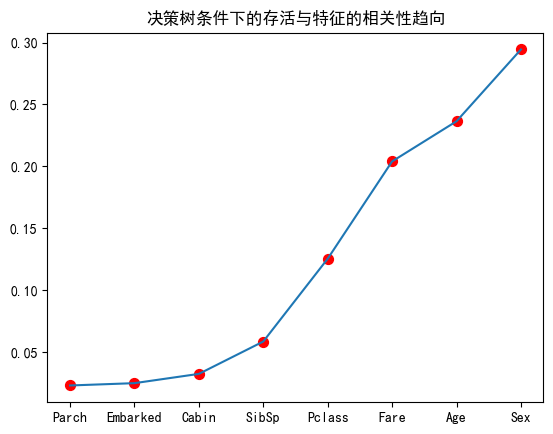

In [19]:
# 最后试试使用决策树
# 效果不佳 
tree = DecisionTreeClassifier(random_state=42)  
tree.fit(trainData, trainResult)
relevance = pandas.DataFrame({
    '特征' : tree.feature_names_in_,
    '相关性' : tree.feature_importances_
})
relevance = relevance.sort_values(by='相关性')
plt.plot(numpy.arange(8), relevance.相关性)
plt.scatter(numpy.arange(8), relevance.相关性, s=50, c='r')
plt.xticks(labels=relevance.特征, ticks=numpy.arange(8))
predictions = tree.predict(testData)
print("预测存活情况 : ", predictions)
plt.title('决策树条件下的存活与特征的相关性趋向')
;